<a href="https://colab.research.google.com/github/brunobro/escalograma-series-temporais/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Escalograma para análise de Séries Temporais</h1>**
<h2>Transformada Waveletel Contínua</h2>
<p>Neste projeto aprenderemos como implementar o Escalograma da Transformada Wavelet Contínua e como utilizar esta ferramenta para análise de sinais.</p>
<br>

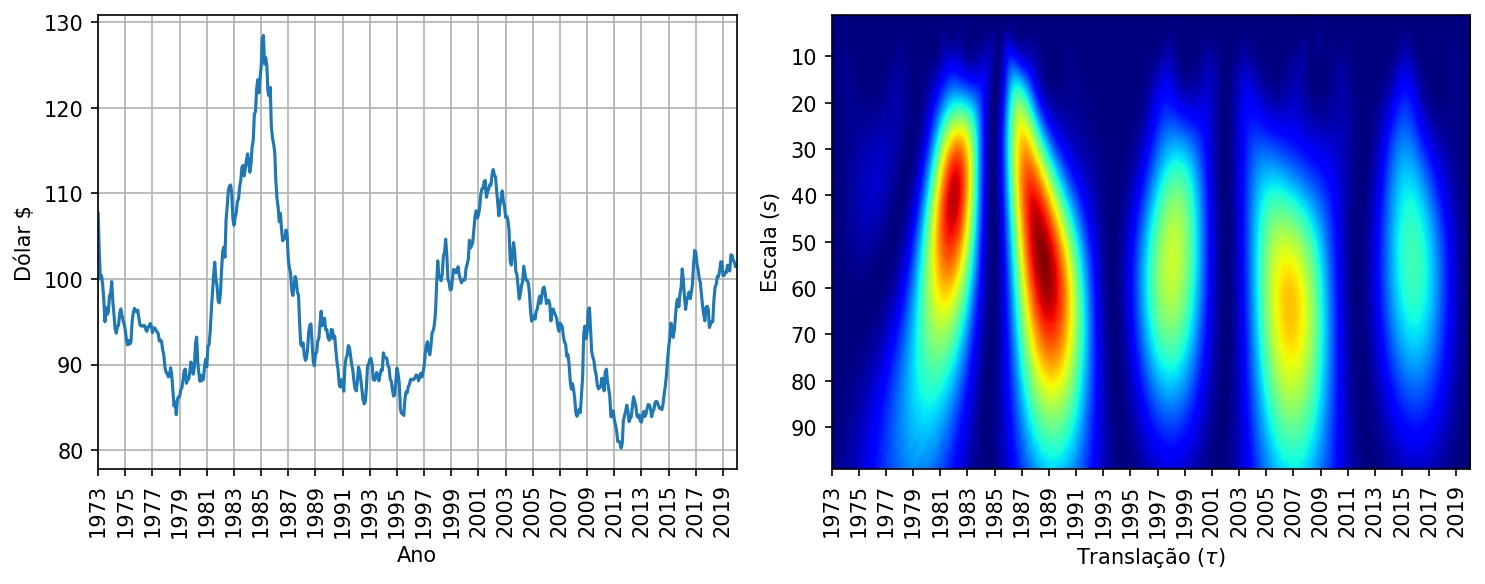

# **Funções Wavelets**

Primeiramente é necessário definir as características de uma função Wavelet.

Dada uma função $\psi(t)$ de quadrado integrável e com norma unitária, esta é uma Wavelet se<br><br>
$$
C_{\psi} = 2\pi \int_{-\infty}^{\infty} \dfrac{|{\Psi}(\omega)|}{|\omega|} d\omega < \infty
$$
<br>
onde ${\Psi}(\omega)$ é a Transformada de Fourier de $\psi(t)$.
<p>A integral converge se ${\Psi}(0) = 0$, implicando que<br><br>
$$
\int_{-\infty}^{\infty} \psi(t) dt = 0
$$
<br>
ou seja, as áreas acima e abaixo da curva $\psi(t)$ devem se anular quanto $t \rightarrow \pm \infty$.
<br>
Alguns exemplos de funções wavelets com suporte infinito, mas suporte efetivo finito.

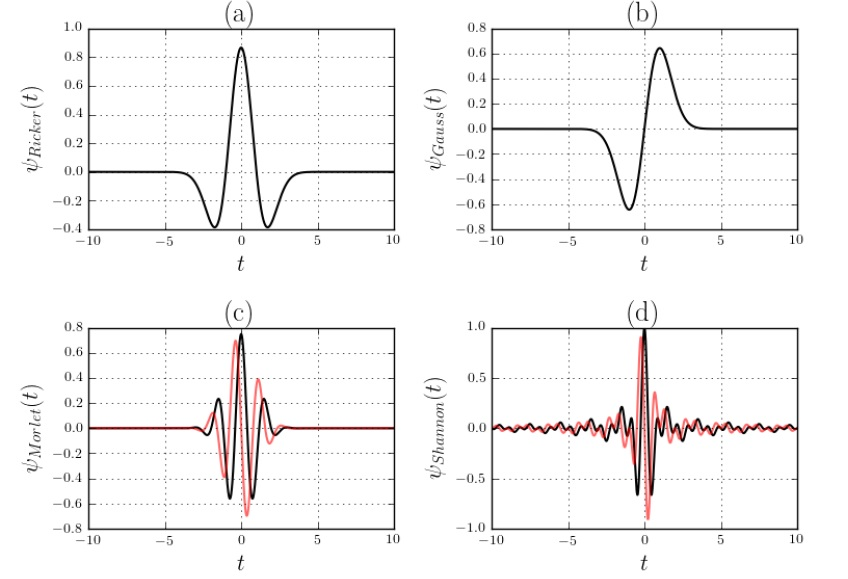

As formulações dessas funções são dadas por
<br>
$$
\psi_{Ricker}(t) = \xi(t) \dfrac{2(1-t^2)}{\sqrt{3}}
$$
<br>
$$
\psi_{Gauss}(t) = \xi(t) \sqrt{2} t
$$
<br>
$$
\psi_{Morlet}(t) = \xi(t) \exp(-i\omega_0 t)
$$
<br>
$$
\psi_{Shannon}(t) = \dfrac{\sin(t) \exp(-i2\pi t)}{t}
$$
<br>
<p>onde $i = \sqrt{-1}$ e $\xi(t) = \dfrac{\exp(-t^2/2)}{\pi^{1/4}}$.</p>
<br>
<p>Notamos que a função exponencial $\xi(t)$ que aparece nas várias formulações é um <b>protótipo</b> para criarmos funções wavelets. Assim basta multiplicar uma função $f(x)$, simétrica em relação à origem, isto é, $f(-x) = -f(x)$ por essa protótipo para obter uma nova wavelet.</p>
<br>

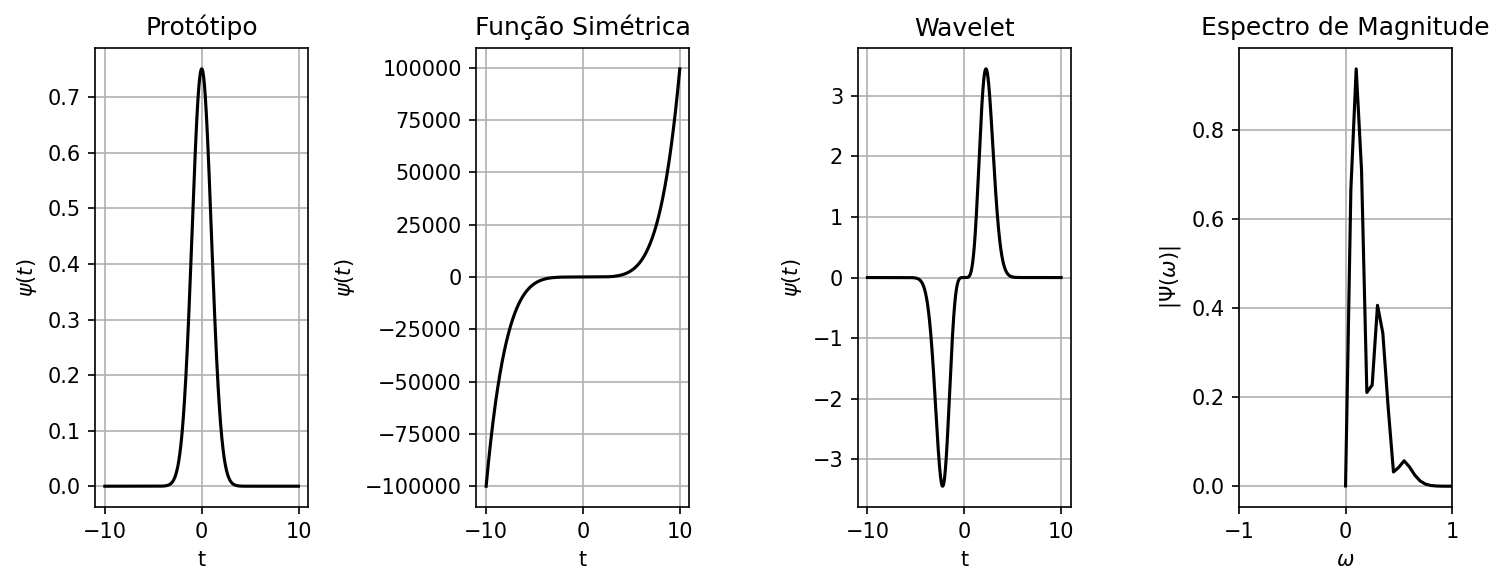

In [ ]:
#Criando uma função Wavelet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

T             = 1/100                           #Período de amostragem (equivalente a 100Hz)
t             = np.arange(-10, 10, T)           #índice temporal
prototipo     = np.exp(-t**2 / 2) / np.pi**0.25 #função protótipo
funcao_sim    = t**5                            #função simétrica em relação à origem
psi           = funcao_sim * prototipo          #função wavelet criada

fig = plt.figure(dpi=150, figsize=(10, 4))

ax0 = fig.add_subplot(141)
ax0.plot(t, prototipo, color='k')
ax0.set_title('Protótipo')

ax1 = fig.add_subplot(142)
ax1.plot(t, funcao_sim, color='k')
ax1.set_title('Função Simétrica')

ax2 = fig.add_subplot(143)
ax2.plot(t, psi, color='k')
ax2.set_title('Wavelet')

ax3 = fig.add_subplot(144)
ax3.magnitude_spectrum(psi, 1/T, color='k')
ax3.set_title('Espectro de Magnitude')
ax3.grid()
ax3.set_xlabel('$\omega$')
ax3.set_ylabel('$|{\Psi}(\omega)|$')
ax3.set_xlim([-1, 1])

for ax in [ax0, ax1, ax2]:
    ax.grid()
    ax.set_xlabel('t')
    ax.set_ylabel('$\psi(t)$')

fig.tight_layout()
plt.show()

In [ ]:
#Calcula área sob a curva da função wavelet
print('Área', np.sum(psi))

Área 0.0


**<h3>Momentos Nulos</h3>**
<p>A quantidade de momentos nulos das funções Wavelets é uma propriedade importante destas funções.</p>
<p>Dada uma função $f(t)$ de quadrado integrável o $n$-ésimo momento dessa função é dado por</p><br>
$$
m_n = \int_{-\infty}^{\infty} t^n f(t) dt
$$
<br>
<p>Se tomarmos $f(t)$ como uma densidade de probabilidade, então o primeiro momento, $n=1$, é a esperança matemática, pois</p>
<br>
$$
m_1 = \int_{-\infty}^{\infty} t f(t) dt
$$
<br>
<p>Se a integral de momentos de uma função Wavelet $\psi(t)$ se anula para $N-1$ primeiros momentos, então essa Wavelet tem $N$ momentos nulos.</p>
<br>
$$
\int_{-\infty}^{\infty} t^n \psi(t) dt = 0, ~n=0,1,2,\cdots,N-1
$$
<br>
<p>Levando em conta a definição de produto interno, temos que, a propriedade de momentos nulos pode ser assim interpretada</p><br>
$$
\langle t^n , \psi(t) \rangle = 0, ~n=0,1,2,\cdots,N-1
$$
<br>
<p>ou seja, uma função Wavelet com $N$ momentos nulos é ortogonal a um polinômio de grau $N-1$.</p>
<br><br>

**<h3>Wavelets a partir de derivadas</h3>**

Dada uma função $\theta(t)$ com decaimento rápido, isto é $|\theta(t)| \leq C_m/(1 + |t|^{m}), \forall t \in \mathbb{R}$, $m \in \mathbb{N}$, uma wavelet com $n$ momentos nulos é obtida derivando $\theta(t)$ $n$ vezes:
<br><br>
$$
\psi(t) = (-1)^{n}\frac{\textrm{d}^n \theta(t)}{\textrm{d}t^n}
$$
<br>
**Exemplo:** 

Seja $\theta(t) = \dfrac{\exp(-t^2/2)}{\pi^{1/4}}$ um função com decaimento rápido.

Então temos:

$\psi_1(t) = t\theta(t)$<br>

$\psi_2(t) = (t^2 - 1)\theta(t)$<br>

$\psi_3(t) = (t^3 - 3t)\theta(t)$<br>

Áreas das funções wavelets (derivadas):
G1: -0.0000
G2: 0.0000
G3: 0.0000


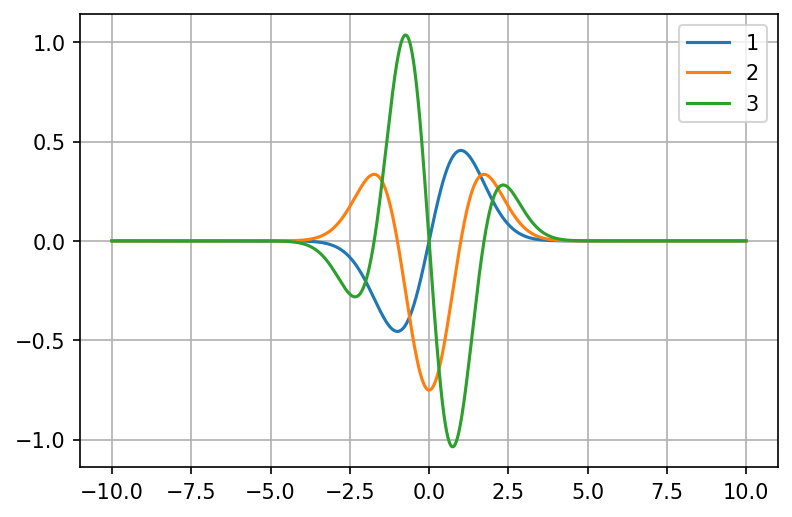

In [ ]:
#Verificar a quantidade de momentos nulos

def __mn(t, psi, p = 4):
    '''
    Computa a quantidade de momentos nulos da wavelet psi
    t: vetor para indexação
    psi: função Wavelet aplicada em t
    p: precisão para evitar erros na comparação com 0
    '''
    n = 0 
    
    while True:
        i = np.inner(t**n, psi) #produto interno
        if np.round(i, p) == 0: #verifica se o produto interno é zero ou próximo até a precisão p
            n += 1
        else:
            break
    return n
            
#Cálculo dos momentos nulos das Wavelets Gaussianas
t  = np.arange(-10, 10, 1/100)
THETA  = np.exp(-t**2 / 2) / (np.pi)**(1./4)

G1 = t * THETA            #Wavelet 1: primeira derivada da função gaussiana
G2 = (t**2 - 1) * THETA   #Wavelet 2: segunda derivada da função gaussiana
G3 = (t**3 - 3*t) * THETA #Wavelet 3: terceira derivada da função gaussiana

#Calcul as áreas de cada wavelet
print('Áreas das funções wavelets (derivadas):')
print('G1: %.4f' %np.sum(G1))
print('G2: %.4f' %np.sum(G2))
print('G3: %.4f' %np.sum(G3))

#Mostra as funções wavelets
fig = plt.figure(dpi=150, figsize=(6, 4))
plt.plot(t, G1, label=__mn(t, G1))
plt.plot(t, G2, label=__mn(t, G2))
plt.plot(t, G3, label=__mn(t, G3))
plt.grid()
plt.legend()
plt.show()

**<h3>Família de Funções Wavelets</h3>**
<p>Uma família de funções Wavelets é obtida variando os parâmetros de escala $s$ e translação $\tau$, assim:</p>
<br>
$$
\psi_{s, \tau}(t) = |s|^{-1/2} \psi\left( \dfrac{t - \tau}{s} \right)
$$
<br>
<p>
    <ul>
        <li>Se $0 < s < 1$ então $\psi_{s, \tau}(t)$ é uma versão comprimida de $\psi(t)$</li>
        <li>Se $s > 1$ então $\psi_{s, \tau}(t)$ é uma versão expandida de $\psi(t)$</li>
    </ul>
</p>

**<h4>Exemplo</h4>**

<p>A Wavelet Complexa de Morlet é expressa por</p><br>
$$
\psi(t) = \dfrac{1}{\sqrt{\pi B}} \exp(-t^2/B) \exp(i2\pi C t)
$$
<br>
<p>onde $B$ é a largura de banda e $C$ a frequência central</p>

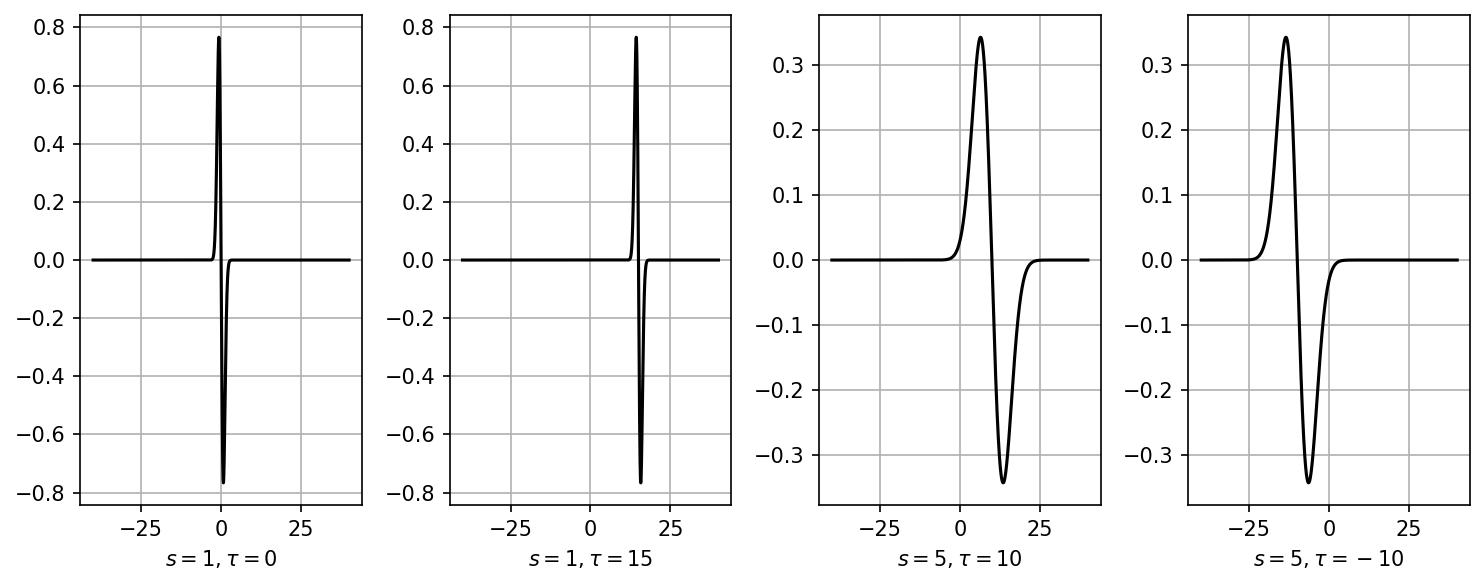

In [ ]:
#Exemplo de família de funções wavelets Coplexas de Morlet
t = np.arange(-40, 40, 1/100)

fig2 = plt.figure(dpi=150, figsize=(10, 4))
    
for i, item in enumerate([(0, 1), (15, 1), (10, 5), (-10, 5)]):
    
    tau, s = item
    
    arg = (t - tau)/s
    G1  = np.abs(s)**(-0.5) * (-2) * arg * (2/np.pi)**(1./4) * np.exp(-arg**2)

    ax = fig2.add_subplot(1, 4, i + 1)
    ax.plot(t, G1, color='k')
    ax.set_xlabel('$s = ' + str(s ) + ', \\tau = ' + str(tau) + '$')
    ax.grid()
    
fig2.tight_layout()
plt.show()

**<h3>Transformada Wavelet Contínua</h3>**
<p>A Transformada Wavelet Contínua (Continuous Wavelet Transform - CWT) é uma mapeamento $W f(s, \tau): L^2(\mathbb{R}) \mapsto L^2(\mathbb{R}^* \times \mathbb{R})$ obtido pela integral de convolução</p><br>
$$
W f(s, \tau) = \int_{-\infty}^{\infty} f(t) \bar{\psi}_{s, \tau}(t) dt
$$
$$
W f(s, \tau) = (f \star \psi_s)(\tau)
$$
<br>

**<h3>Escalograma</h3>**

<p>O escalograma é o espectro de energia dos coeficientes Wavelets em uma dada escala.</p>
<br>
$$
E(s, \tau) = |Wf(s, \tau)|^2
$$
<br>
<p></p>

**<h4>Exemplo: Análise de frequências variáveis</h4>**

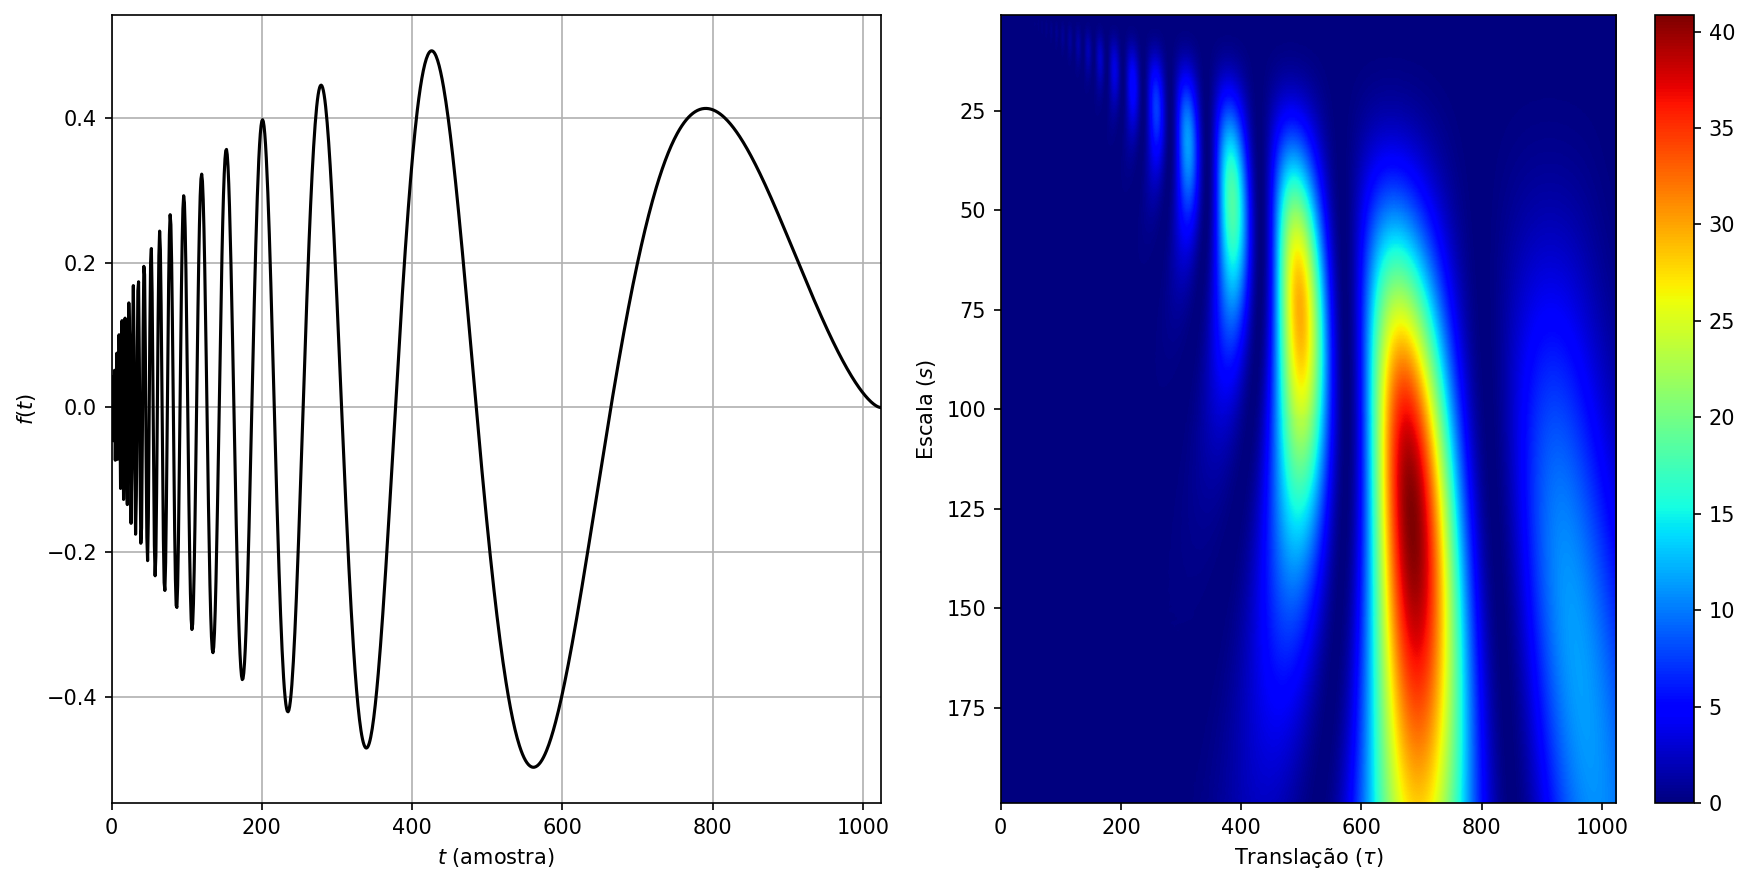

In [ ]:
#Pacote PyWavelets
import pywt

#Exemplo da CWT para analisar um sinal com frequência variável

f   = pywt.data.demo_signal('doppler', 1024)   #Sinal doppler
s   = np.arange(1, 200)                        #Escalas utilizadas
wav = 'gaus1'                                  # Wavelet gaussiana com 1 momento nulo

W, _ = pywt.cwt(f, s, wav, method='fft') #coeficientes wavelets
W    = np.abs(W)**2                      #obtêm o Esclograma

plt.figure(dpi=150, figsize=(12, 6))

plt.subplot(121)
plt.plot(f, color='k')
plt.xlabel('$t $ (amostra)')
plt.ylabel('$f(t)$')
plt.xlim([0, len(f)])
plt.grid()

plt.subplot(122)
plt.imshow(W, extent=[0, len(f), s[-1], s[0]], cmap='jet', aspect='auto')
plt.xlabel('Translação ($\\tau$)')
plt.ylabel('Escala ($s$)')
plt.ylim([s[-1], s[0]])
plt.xlim([0, len(f)])
plt.colorbar()

plt.tight_layout()
plt.show()

**<h4>Exemplo: Análise de frequência específica</h4>**

<p>Para analisar frequências específicas a Wavelet Complexa de Morlet</p><br>
$$
\psi(t)_{\textrm{cmorB-C}} = \dfrac{1}{\sqrt{\pi B}} \exp(-t^2/B) \exp(j2\pi C t)
$$
<br>
<p>torna a busca pela escala adequada mais fácil, pois para $C=1$ na escala $s=1$ esta Wavelet será amostrada com o mesmo período do sinal analisado, devido a relação de Euler $\exp(jt) = \cos(t) + j \sin(t)$. Assim sendo, para um sinal amostrado a $Fs$ Hz, se pretende-se determinar a escala $k_s$ onde o Escalograma será mais significativo para uma frequência $\alpha$ Hz, basta fazer</p><br>
$$
k_s = \dfrac{Fs}{\alpha}
$$
<br>
<p>com $\alpha >0$.</p><br>
<p>Analogamento, podemos também utilizar as Wavelets de Shannon e $B$-spline, definidas pelas equações respectivas:</p><br>
$$
\psi(t)_{\textrm{shanB-C}} = \sqrt{B} \left[ \dfrac{\sin(\pi B t)}{\pi B t} \right] \exp(j 2\pi C t)
$$
<br>
$$
\psi(t)_{\textrm{fbspM-B-C}} = \sqrt{B} \left[ \dfrac{\sin(\pi B t / M)}{\pi B t / M} \right]^M \exp(j 2\pi C t)
$$

Frequências:
 [100.    50.    33.33  25.    20.    16.67  14.29  12.5   11.11  10.
   9.09   8.33   7.69   7.14   6.67   6.25   5.88   5.56   5.26]  Hz


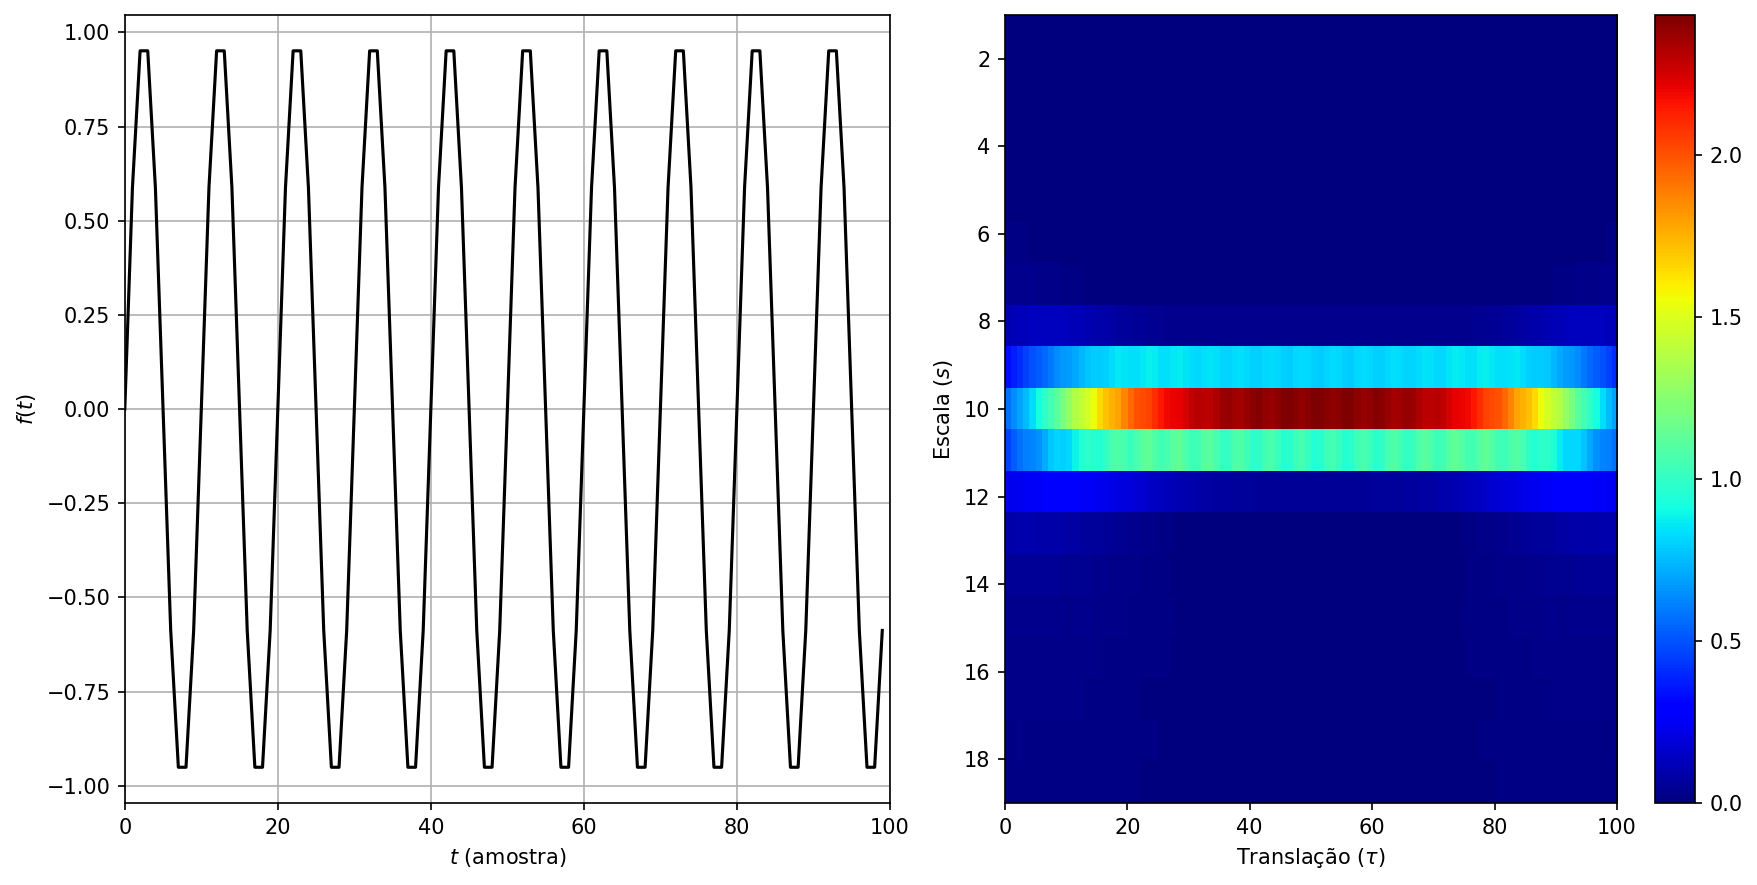

In [ ]:
#Exemplo da CWT para analisar uma frequência específica utilizando a Wavelet Complexa de Morlet


Fs  = 100                        #Frequênciad e amostragem 100Hz
t   = np.arange(0, 1, 1/Fs)      #Índice temporal
f   = np.sin(2 * np.pi * t * 10) #Sinal senoidal puro de 10Hz
s   = np.arange(1, 20)           #Escalas utilizadas
wav = 'cmor5.0-1.0'              # Wavelet de Complexa de Morlet com B = 5.0 e C = 1.0
fre = pywt.scale2frequency(wav, s) * Fs #Converte escala para as frequências relativas

print('Frequências:\n', np.round(fre, 2), ' Hz')

W, _ = pywt.cwt(f, s, wav, method='fft') #coeficientes wavelets
W    = np.abs(W)**2                      #obtêm o Escalograma

plt.figure(dpi=150,figsize=(12, 6))

plt.subplot(121)
plt.plot(f, color='k')
plt.xlabel('$t $ (amostra)')
plt.ylabel('$f(t)$')
plt.xlim([0, len(f)])
plt.grid()

plt.subplot(122)
plt.imshow(W, extent=[0, len(f), s[-1], s[0]], cmap='jet', aspect='auto')
plt.xlabel('Translação ($\\tau$)')
plt.ylabel('Escala ($s$)')
plt.ylim([s[-1], s[0]])
plt.xlim([0, len(f)])
plt.colorbar()

plt.tight_layout()
plt.show()

**Exemplo: Análise de um sinal de Eletrocardiograma**

Escalas: [3.00, 8.00]
Escala - Frequência
[3.00, 120.00]
[4.00, 90.00]
[5.00, 72.00]
[6.00, 60.00]
[7.00, 51.43]
[8.00, 45.00]


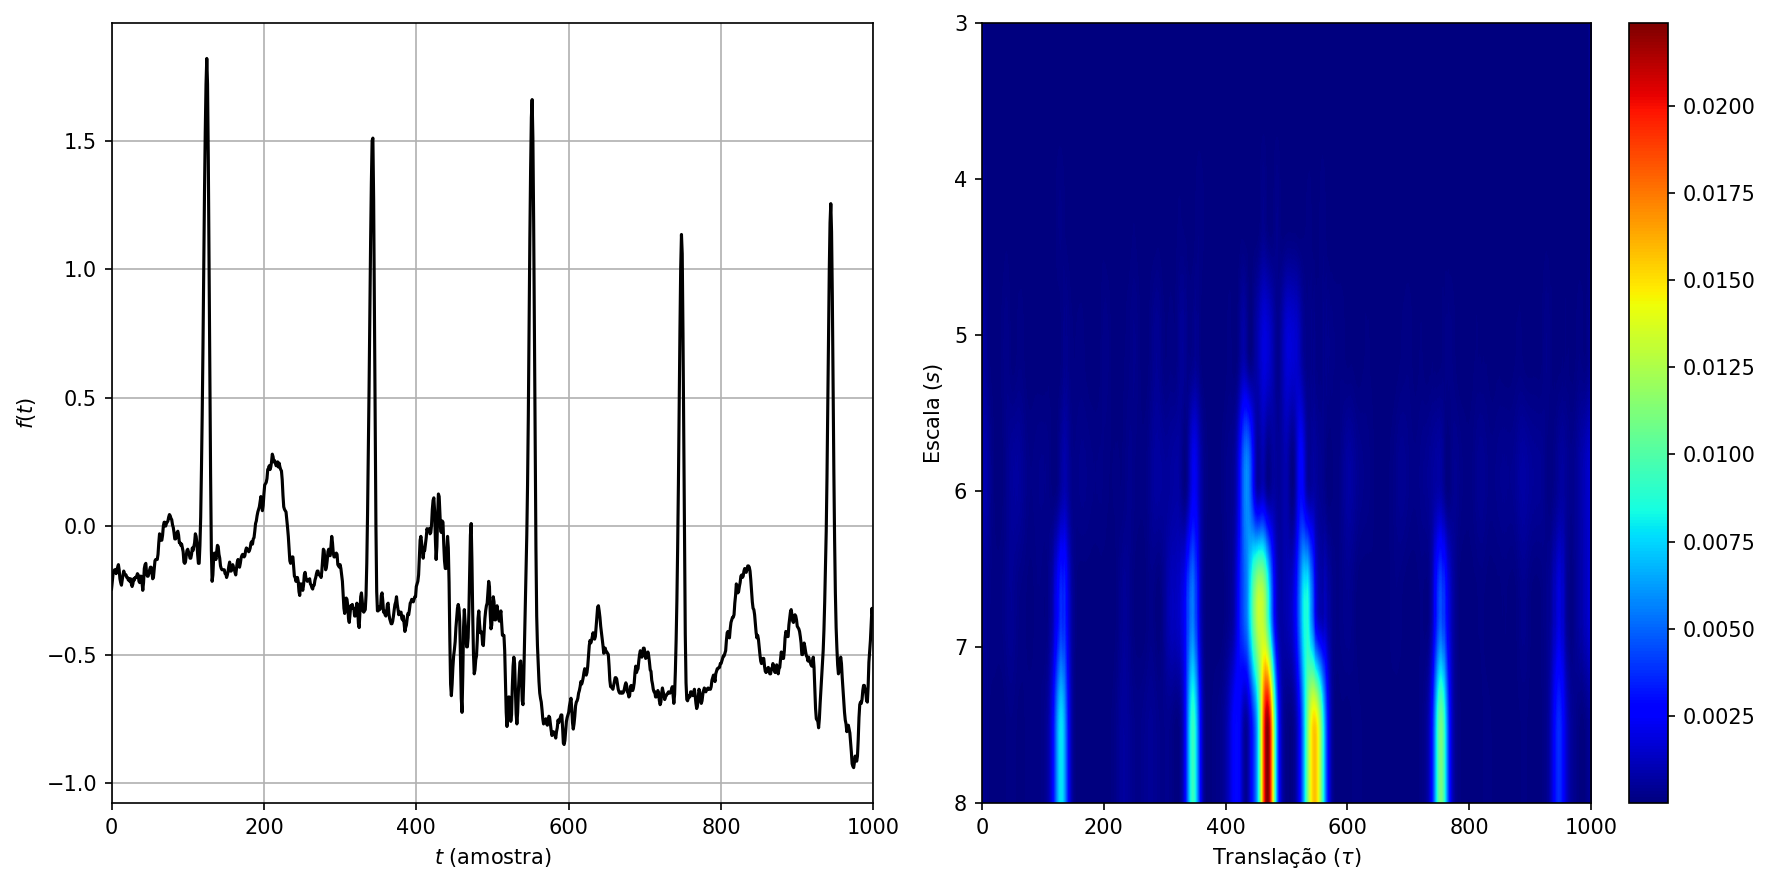

In [ ]:
from scipy.misc import electrocardiogram

#Toma 1000 amostras de um ECG amostrado a 360Hz
Fs  = 360
ecg = electrocardiogram()[0:1000]

#Seleciona a escala ks para frequências en torno de alpha Hz
α  = 100
ks = int(Fs / α)

c       = 5
s_start = ks - c
s_end   = ks + c
if s_start <= 0:
  s_start = ks

print('Escalas: [%.2f, %.2f]' %(s_start, s_end))

#Parâmetros para a CWT
s   = np.arange(s_start, s_end + 1) #Escolhe as escalas. 5 acima e 5 abaixo da escala específica ks
wav = 'cmor5.0-1.0'             # Wavelet de Complexa de Morlet com B = 5.0 e C = 1.0

#Mostra as frequências cobertas para a wavelet e escalas selecionadas
fre = pywt.scale2frequency(wav, s) * Fs #Converte escala para as frequências relativas
print('Escala - Frequência')
for i, item in enumerate(s):
  print('[%.2f, %.2f]' %(item, fre[i]))

#Computa a CWT
W, _ = pywt.cwt(ecg, s, wav, method='fft') #coeficientes wavelets
W    = np.abs(W)**2                      #obtêm o Escalograma

plt.figure(dpi=150,figsize=(12, 6))

plt.subplot(121)
plt.plot(ecg, color='k')
plt.xlabel('$t$ (amostra)')
plt.ylabel('$f(t)$')
plt.xlim([0, len(ecg)])
plt.grid()

plt.subplot(122)
plt.imshow(W, extent=[0, len(ecg), s[-1], s[0]], cmap='jet', aspect='auto')
plt.xlabel('Translação ($\\tau$)')
plt.ylabel('Escala ($s$)')
plt.ylim([s[-1], s[0]])
plt.xlim([0, len(ecg)])
plt.colorbar()

plt.tight_layout()
plt.show()

**<h4>Exemplo: Análise da série histórica do dólar</h4>**

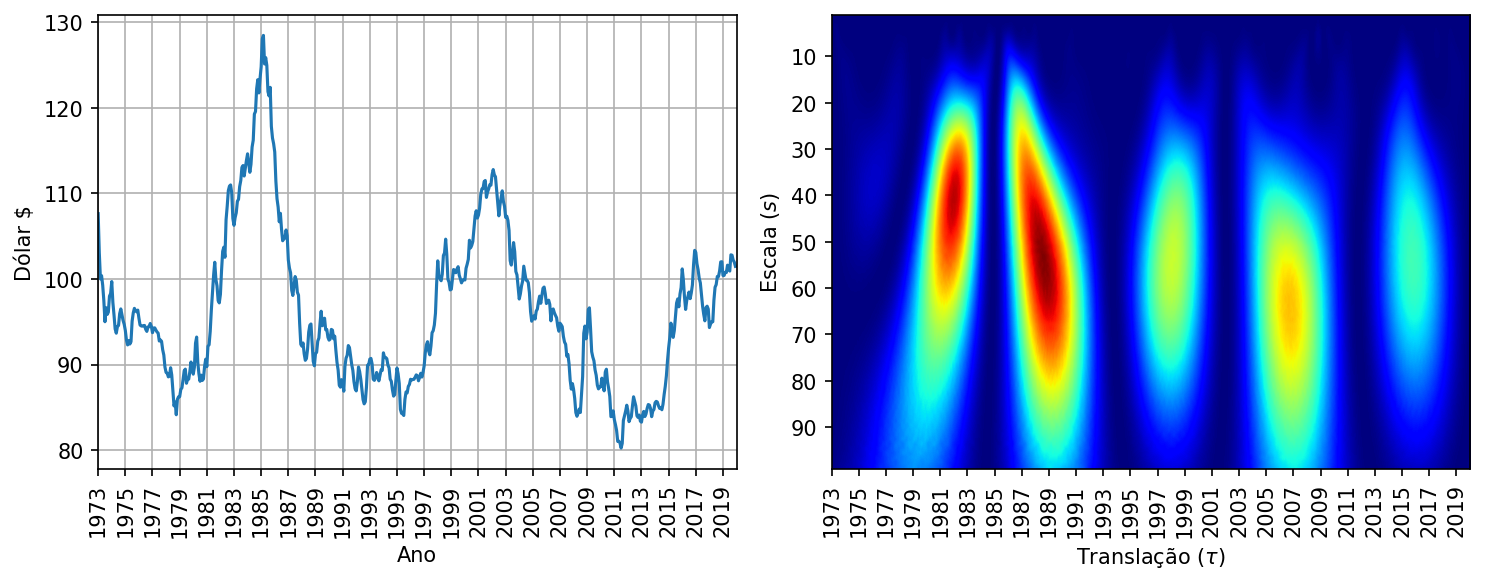

In [ ]:
import datetime
import pandas as pd

#Série histórica mensal do dólar de 1973 a 2019
df = pd.read_csv('dollar-index.csv')

#Serie do Dólar
serie = df['value']

#Para evitar problemas de borda insere amostras adicionais a série
#mais detalhes: https://pywavelets.readthedocs.io/en/latest/ref/signal-extension-modes.html#ref-modes
amostras_pad = 200
serie_pad    = pywt.pad(serie, amostras_pad, 'symmetric')

#Obtém o ano inicial e final
ano_inicial = datetime.datetime.strptime(min(df['date']), "%Y-%m-%d").year
ano_final   = datetime.datetime.strptime(max(df['date']), "%Y-%m-%d").year

#Cria indices para mostrar no eixo x
anos = np.arange(ano_inicial, ano_final + 1, 2)
ia   = np.arange(0, len(serie), 24)

#Calcula o escalograma
wav  = 'gaus1'                     # Wavelet com 1 momento nulo
s    = np.arange(1, 100)           #Escalas utilizadas
C, _ = pywt.cwt(serie_pad, s, wav, method='fft') #coeficientes wavelets
W    = np.abs(C)**2                #obtêm o Escalograma

#Trunca W devido a operação de inserção de amostras (padding)
W = W[:, amostras_pad:-amostras_pad]

plt.figure(dpi=150, figsize=(10, 4))
plt.subplot(121)
plt.plot(serie)
plt.ylabel('Dólar $')
plt.xlabel('Ano')
plt.xticks(ia, anos, rotation='vertical')
plt.xlim([0, len(serie)])
plt.grid()
plt.subplot(122)
plt.imshow(W, extent=[0, len(serie), s[-1], s[0]], cmap='jet', aspect='auto', interpolation='spline16')
plt.xticks(ia, anos, rotation='vertical')
plt.yticks(np.arange(0, len(s), 10))
plt.xlabel('Translação ($\\tau$)')
plt.ylabel('Escala ($s$)')
plt.ylim([s[-1], s[0]])
plt.xlim([0, len(serie)])
#for i in np.arange(1, int(len(s)/12)):
#  plt.plot(np.ones(len(serie)) * (i * 12), color='white', alpha=0.5)
plt.tight_layout()
plt.show()

# **Análise do escalograma**

*   Observamos mais energia entres os anos:
  *   1980 a 1983 (período crescente da série)
  *   1987 a 1991 (período decrescente da série)
*   Há mais energia concentrada no período de decrescimento do que naquele de crescimento, pois o período de
  *   crescimento dura 6 anos (1979-1985)
  *   decrescimento dura 10 anos (1985-1995)
  





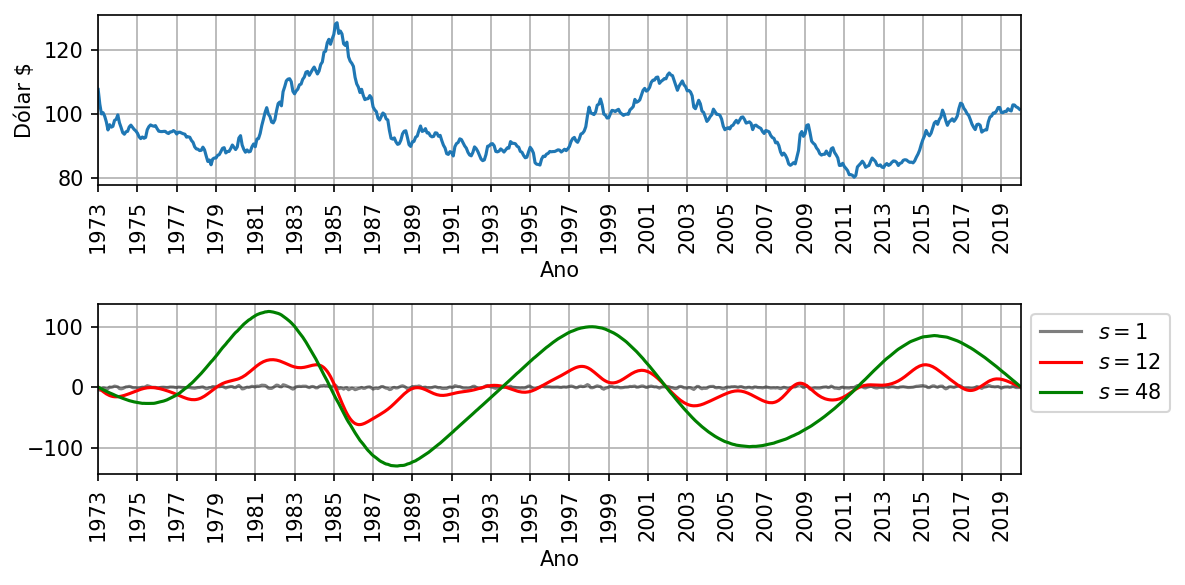

In [ ]:
#Analisando alguns coeficientes wavelets

#Multiplica todos os coeficientes wavelets por (-1), por de acordo com Mallat
# (-1) derivada primeira será correspondente aos pontos de variação da função
C1 = -C

#Coeficientes em algums escalas normalizados
Cs1  = C1[0,amostras_pad:-amostras_pad]
Cs16 = C1[11,amostras_pad:-amostras_pad]
Cs48 = C1[47,amostras_pad:-amostras_pad]

#Cs1  = Cs1/np.linalg.norm(Cs1, 1)
#Cs16 = Cs16/np.linalg.norm(Cs16, 1)
#Cs48 = Cs48/np.linalg.norm(Cs48, 1)

plt.figure(dpi=150, figsize=(8, 4))
plt.subplot(211)
plt.plot(serie)
plt.ylabel('Dólar $')
plt.xlabel('Ano')
plt.xticks(ia, anos, rotation='vertical')
plt.xlim([0, len(serie)])
plt.grid()
plt.subplot(212)
plt.plot(Cs1, label='$s=1$', color='k', alpha=0.5)
plt.plot(Cs16, label='$s=12$', color='r')
plt.plot(Cs48, label='$s=48$', color='g')
plt.xticks(ia, anos, rotation='vertical')
plt.xlabel('Ano')
plt.xlim([0, len(serie)])
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# **Análise dos coeficientes wavelets**



*   Os coeficientes em escalas mais altas mostram
  *   os intervalos de decrescimento e crescimento da série do dólar
  *   as variações de longo prazo
*   Os coeficientes em escala mais baixam mostram as variações de curto prazo



<h3>Referências</h3>
<ul>
    <li>MALLAT, Stéphane. A Wavelet Tour of Signal Processing: The Sparse Way. 3 ed. New York: Elsevier, 2009.</li>
    <li>Daubechies, Ingrid. Ten Lectures on Wavelets. Philadelphia: SIAM, 1992.</li>
    <li>NIEVERGELT, Yves. Wavelets Made Easy. New York: Springer + Business Media, LLC, 1999.</li>
    <li>Donoho, DL; Johnstone, IM. Threshold selection for wavelet shrinkage of noisy data. Proceedings of 16th Annual International Conference of the IEEE Engineering in Medicine and Biology Society, Baltimore, MD, USA, (1):A24-A25. 1994.</li>
    <li>WEEKS, Michael. Processamento Digital de Sinais utilizando Matlab e Wavelets. Rio de Janeiro: LTC, 2012.</li>
    <li>DUARTE, Marco Aparecido Queiroz. Redução de ruído em sinais de voz no domínio wavelet. 2005. xvii, 105 f. Tese (doutorado) - Universidade Estadual Paulista, Faculdade de Engenharia de Ilha Solteira, 2005. Disponível em: http://hdl.handle.net/11449/100369</li>
    <li>OLIVEIRA, Hélio Magalhães. Análise de Sinais para Engenheiros. Rio de Janeiro: Brasport, 2007.</li>
    <li>Oliveira, BR; Duarte, MAQ; Abreu, CCE; Vieira Filho, J. A wavelet-based method for power-line interference removal in ECG signals. Research on Biomedical Engineering 34 (1), 73-86. 2018.</li>
    <li>Gossler, FE; Oliveira, BR, Duarte, MAQ; Lamblém, RL; Alvarado, FV. A Wavelet Generated from Fibonacci-Coefficient Polynomials and Its Aapplication in Cardiac Arrhythmia Classification. Proceedings of XIX ENMC - National Meeting on Computational Modeling and VII ECTM - Meeting on Materials Science and Technology. 2016.</li>
    
</ul>